In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
sections = np.arange(0,100,1)
sections = np.repeat(sections, 211)
sections

array([ 0,  0,  0, ..., 99, 99, 99])

In [3]:
plots = np.arange(0,211,1)
plots = list(plots)
plots = plots*100
plots = np.array(plots)
plots

array([  0,   1,   2, ..., 208, 209, 210])

In [4]:
len(sections) == len(plots)

True

In [5]:
mw_present = np.random.normal(10, 6.5, int(len(sections)*.2))
mw_present = mw_present.clip(min=0)
mw_present = mw_present.astype('int')

In [6]:
mw_present = list(mw_present)
mw_present.extend([0]*int(len(sections)*.8))
random.shuffle(mw_present)
mw_present

[0,
 0,
 0,
 13,
 17,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 0,
 9,
 0,
 13,
 0,
 0,
 8,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 2,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 21,
 0,
 0,
 13,
 17,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 13,
 6,
 10,
 24,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 16,
 0,
 0,
 2,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 10,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,
 0,
 10,
 0,
 16,
 0,
 0,
 0,
 0,
 18,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 0,
 0,
 8,
 14,
 0,
 0

In [7]:
len(mw_present)

21100

In [8]:
df = pd.DataFrame({'section': sections, 'plot': plots, 'mw': mw_present})
df

,section,plot,mw
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,13
4,0,4,17
...,...,...,...
21095,99,206,0
21096,99,207,0
21097,99,208,0
21098,99,209,18


In [9]:
df['mw'].mean()

1.9376303317535546

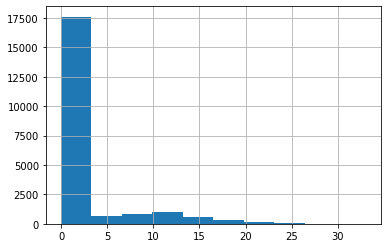

In [10]:
df['mw'].hist()

In [11]:
srs = df.sample(60)
srs

,section,plot,mw
8888,42,26,0
12275,58,37,0
9402,44,118,0
4798,22,156,0
20956,99,67,0
4088,19,79,0
1415,6,149,0
6351,30,21,0
9701,45,206,0
6210,29,91,0


In [12]:
srs['mw'].mean()

1.7

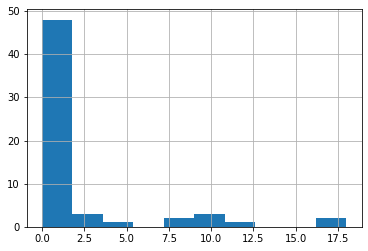

In [13]:
srs['mw'].hist()

In [14]:
clusters = np.random.choice(np.arange(0,100,1), 10)
clusters

array([75, 27, 46, 81, 61, 38, 41, 94, 90, 10])

In [15]:
cluster_sample = []
for cluster in clusters:
    filt = df['section'] == cluster
    sample = df.loc[filt].sample(6)
    cluster_sample.append(sample)
cluster_sample = pd.concat(cluster_sample)
cluster_sample

,section,plot,mw
15841,75,16,0
16022,75,197,0
15866,75,41,0
16012,75,187,0
15832,75,7,0
15878,75,53,0
5733,27,36,0
5812,27,115,0
5784,27,87,0
5844,27,147,9


In [36]:
cluster_sample['mw'].mean()

3.0

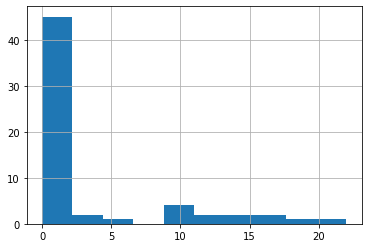

In [37]:
cluster_sample['mw'].hist()

In [71]:
cluster_sample.groupby('section').mean()['mw']

section
10    3.666667
27    1.500000
38    4.333333
41    3.500000
46    3.666667
61    0.000000
75    0.000000
81    7.500000
90    0.833333
94    5.000000
Name: mw, dtype: float64

In [72]:
def cluster_mean(N, M, df):
    """
    N: number of clusters in the population
    M: number of observations in the population
    df: DataFrame with cluster sample
    
    xbar = (N/ (n * M)) * Sum(Mh * xbarh)
    where n: number of clusters in sample
          Mh: number of observations in cluster h
          xbarh: mean from cluster h
    
    """
    
    sections = df['section'].unique()
    
    n = len(sections)
    
    means = []
    samples = []
    
    for section in sections:
        filt = df['section'] == section
        xbarh = df.loc[filt, 'mw'].mean()
        Mbar = 211
        means.append(xbarh)
        samples.append(Mbar)
    
    totals = np.multiply(means, samples)
    print(sum(totals))
    
    return ((N / (n * M)) * sum(totals))

In [74]:
cluster_mean(100, 21100, cluster_sample)

6330.0


3.0

In [ ]:
def cluster_variance()